In [2]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy.signal import find_peaks

In [70]:
#Get Data
cols = ["v_in", "v_out"]
raw_data1 = pd.read_csv("DataFiles/Diode_Si.csv", delimiter="\t", names=cols)
raw_data2 = pd.read_csv("DataFiles/Diode_Si_Backwards.csv", delimiter="\t", names=cols)
#background = pd.read_csv("DataFiles/Gang_4_Pedastal_180sec_Amp150.csv", delimiter="\t", names=cols)


raw_data1

,v_in,v_out
NaN,-1.494878,-0.015141
NaN,-1.490492,-0.015465
NaN,-1.485404,-0.015311
NaN,-1.480152,-0.015184
NaN,-1.474961,-0.015052
...,...,...
NaN,1.382557,1.158044
NaN,1.387056,1.162371
NaN,1.391487,1.166645
NaN,1.395873,1.170893


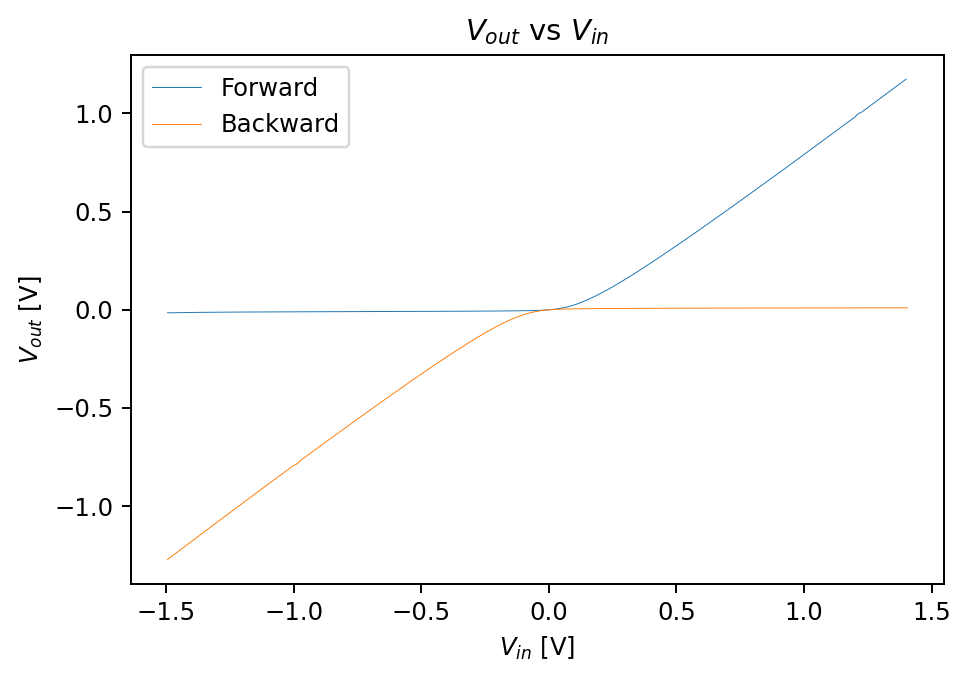

In [93]:
plt.figure(dpi=175)
plt.title("$V_{out}$ vs $V_{in}$")
plt.xlabel("$V_{in}$ [V]")
plt.ylabel("$V_{out}$ [V]")


plt.plot(raw_data1["v_in"], raw_data1["v_out"], lw=0.4, label="Forward")
plt.plot(raw_data2["v_in"], raw_data2["v_out"], lw=0.4, label="Backward")

#plt.vlines(-1, -1.5,1.2)
#plt.ylim(0,.05)

plt.legend()

plt.savefig("Plots/SiDiode_Vin_Vout.pdf")

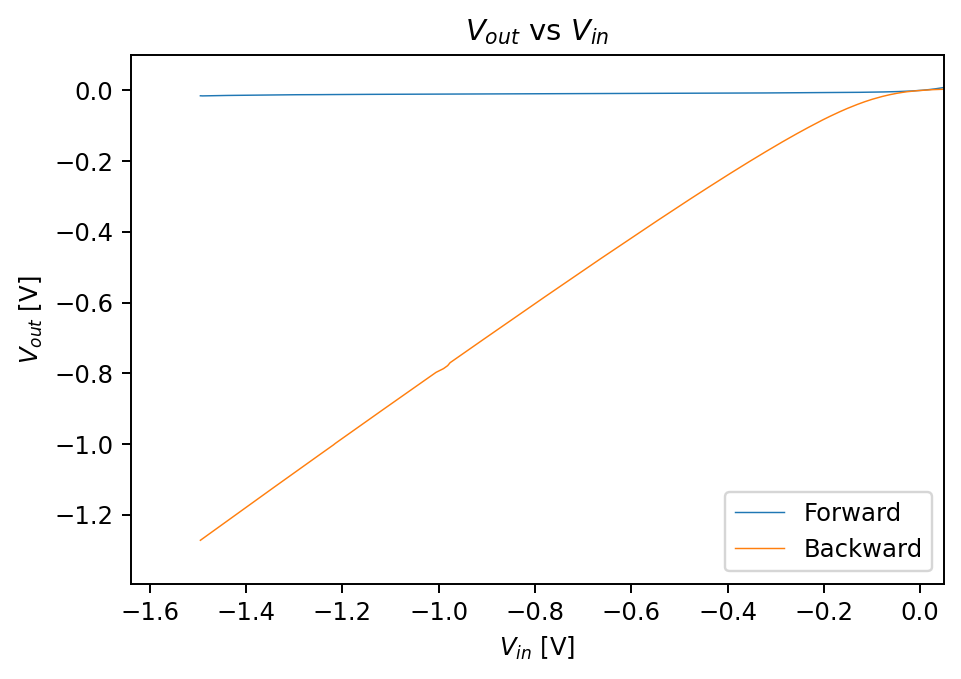

In [94]:
plt.figure(dpi=175)
plt.title("$V_{out}$ vs $V_{in}$")
plt.xlabel("$V_{in}$ [V]")
plt.ylabel("$V_{out}$ [V]")

plt.plot(raw_data1["v_in"], raw_data1["v_out"], lw=0.6, label="Forward")
plt.plot(raw_data2["v_in"], raw_data2["v_out"], lw=0.6, label="Backward")

plt.xlim(right=.05)
plt.ylim(top=.1)
plt.legend()

plt.savefig("Plots/SiDiode_Vin_Vout_Negative.pdf")

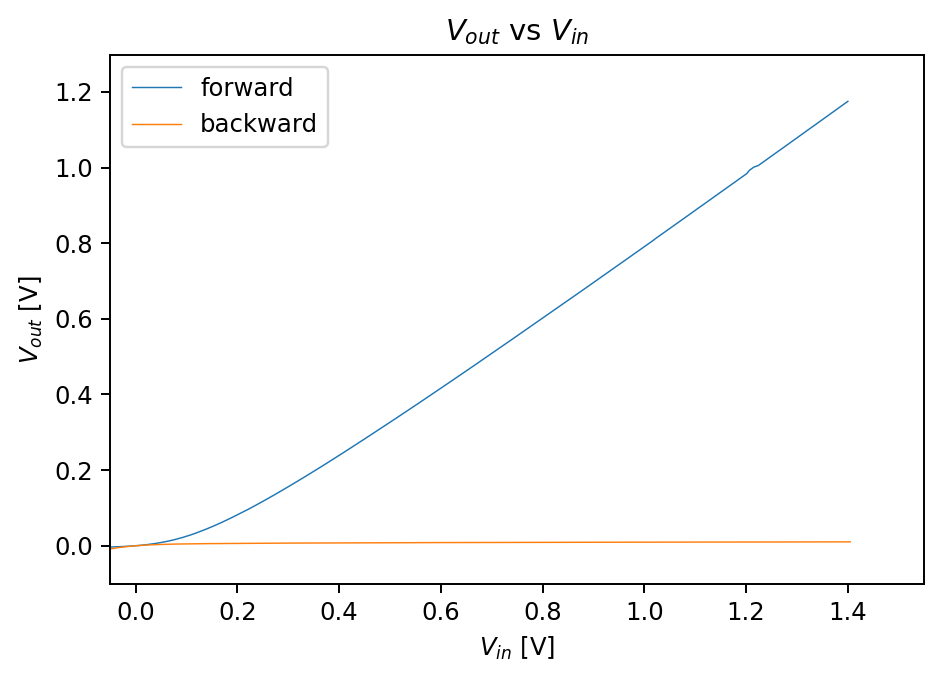

In [77]:
plt.figure(dpi=175)
plt.title("$V_{out}$ vs $V_{in}$")
plt.xlabel("$V_{in}$ [V]")
plt.ylabel("$V_{out}$ [V]")

plt.plot(raw_data1["v_in"], raw_data1["v_out"], lw=0.6, label="forward")
plt.plot(raw_data2["v_in"], raw_data2["v_out"], lw=0.6, label="backward")

plt.xlim(left=-.05)
plt.ylim(bottom=-.1)
plt.legend()

plt.savefig("Plots/SiDiode_Vin_Vout_Positive.pdf")

[-0.0465071   0.16794124  0.75830261 -0.08878464]
[0.00152309 0.00413331 0.00354598 0.0009524 ]
[3.27497051 2.46116238 0.46762024 1.07270356]


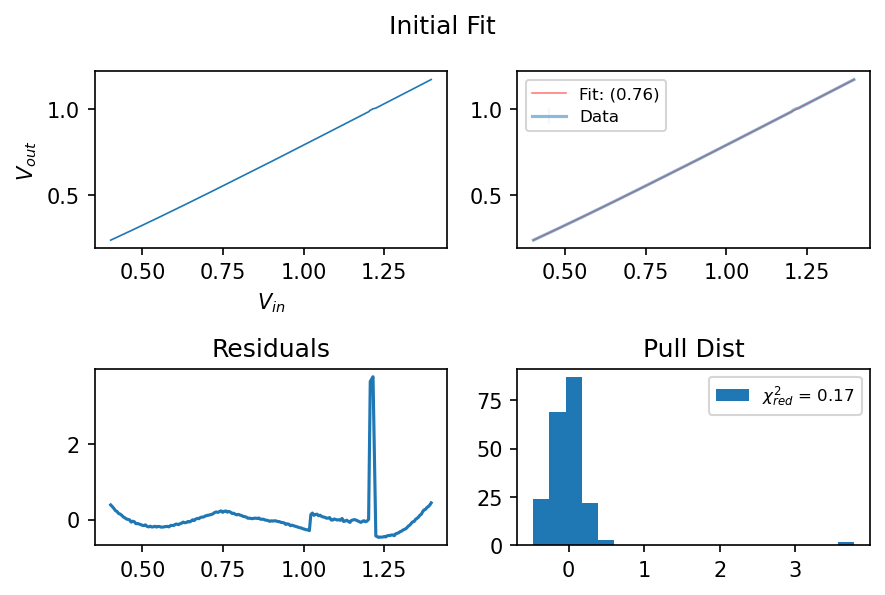

CPU times: user 589 ms, sys: 114 ms, total: 703 ms
Wall time: 719 ms


In [90]:
%%time
def gauss(x,mu=0,sigma=1):
    return np.exp(-((mu-x)**2/(2*(sigma)**2)))

def linear(x, a,b):
    return a*x + b

def quadratic(x, a,b,c):
    return a*x**2 + b*x + c

def qubic(x, a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

def linear_sin(x, a,b,c,d,e):
    return a*x + b*np.sin(c*x+d) + e

func = qubic

##Get Hist
plt.figure(dpi=150)
plt.suptitle(f"Initial Fit")
plt.subplot(2, 2, 1)
plt.xlabel("$V_{in}$")
plt.ylabel("$V_{out}$")

keeps = (raw_data1["v_in"] > .4) & (raw_data1["v_in"] < 1.4)

v_in = raw_data1["v_in"][keeps]
v_out = raw_data1["v_out"][keeps]

plt.plot(v_in, v_out, lw=.8)

errors = v_out.values*0 + .001

#pars, cov = scipy.optimize.curve_fit(single_Gauss, frequency.values, out_in.values, #maxfev=3*10**5, sigma=errors,
#                                     p0=[3,460,20, 1],
#                                     bounds=([0.01,380,1, 0],
#                                             [5,520,200, 1.5]))
pars, cov = scipy.optimize.curve_fit(func, v_in.values, v_out.values, maxfev=3*10**5, sigma=errors,
                                     p0=[0.01,.1,.8,1],#1], #[3,460,20, 1],
                                     #bounds=([0.01,380,1, 0],
                                     #        [5,520,200, 1.5]))
                                    )
#Mean Lines
#plt.vlines(pars[-2],1,5, label=f"{pars[-2]:.1f} ({np.sqrt(cov.diagonal())[-2]:.1f})", color="blue", lw=0.5)

#plt.legend(title="Peaks", prop={"size":6})

#Plot Fit
plt.subplot(2, 2, 2)
x = v_in.values#np.arange(.2,1.5,0.1)
#shows = (np.arange(0,len(wavelength),1)%10 == 0)

plt.errorbar(v_in.values, 
             v_out.values, yerr=errors/10, ms=.2, elinewidth=.1, alpha=0.5, label="Data")
plt.plot(x, func(x, *pars), color="red", lw=.8, alpha=0.5, label=f"Fit: ({pars[-2]:.2f})")
plt.legend(prop={"size":8})
#plt.xscale("log")
#plt.set_xticks(np.arange(300,901,50), minor=1)

print(pars)
print(np.sqrt(cov.diagonal()))
print(np.sqrt(cov.diagonal())/np.abs(pars)*100)

#Residuals
residuals = (v_out.values-func(v_in.values, *pars))/errors
plt.subplot(2, 2, 3)
plt.title("Residuals")
plt.plot(v_in.values, residuals)#, s=1)

#Pull Dist
plt.subplot(2, 2, 4)
plt.title("Pull Dist")
red = "{red}"
plt.hist(residuals, 20, label=f"$\chi_{red}^2$ = {np.sum(residuals**2)/len(residuals):.2f}")
plt.legend(prop={"size":8})

plt.tight_layout()
plt.savefig(f"Plots/SiDiode_Forward_Positive_Fit.pdf")
plt.show()

In [8]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])